# A Python Tour of Data Science: Data Acquisition & Exploration     

[Michaël Defferrard](http://deff.ch), *PhD student*, [EPFL](http://epfl.ch) [LTS2](http://lts2.epfl.ch)

# 1 Exercise: problem definition

Theme of the exercise: **understand the impact of your communication on social networks**. A real life situation: the marketing team needs help in identifying which were the most engaging posts they made on social platforms to prepare their next [AdWords](https://www.google.com/adwords/) campaign.

As you probably don't have a company (yet?), you can either use your own social network profile as if it were the company's one or choose an established entity, e.g. EPFL. You will need to be registered in FB or Twitter to generate access tokens. If you're not, either ask a classmate to create a token for you or create a fake / temporary account for yourself (no need to follow other people, we can fetch public data).

At the end of the exercise, you should have two datasets (Facebook & Twitter) and have used them to answer the following questions, for both Facebook and Twitter.
1. How many followers / friends / likes has your chosen profile ?
2. How many posts / tweets in the last year ?
3. What were the 5 most liked posts / tweets ?
4. Plot histograms of number of likes and comments / retweets.
5. Plot basic statistics and an histogram of text lenght.
6. Is there any correlation between the lenght of the text and the number of likes ?
7. Be curious and explore your data. Did you find something interesting or surprising ?
    1. Create at least one interactive plot (with bokeh) to explore an intuition (e.g. does the posting time plays a role).

# 2 Ressources

Here are some links you may find useful to complete that exercise.

Web APIs: these are the references.
* [Facebook Graph API](https://developers.facebook.com/docs/graph-api)
* [Twitter REST API](https://dev.twitter.com/rest/public)

Tutorials:
* [Mining the Social Web](https://github.com/ptwobrussell/Mining-the-Social-Web-2nd-Edition)
* [Mining Twitter data with Python](https://marcobonzanini.com/2015/03/02/mining-twitter-data-with-python-part-1/)
* [Simple Python Facebook Scraper](http://simplebeautifuldata.com/2014/08/25/simple-python-facebook-scraper-part-1/)

# 3 Web scraping

Tasks:
1. Download the relevant information from Facebook and Twitter. Try to minimize the quantity of collected data to the minimum required to answer the questions.
2. Build two SQLite databases, one for Facebook and the other for Twitter, using [pandas](http://pandas.pydata.org/) and [SQLAlchemy](http://www.sqlalchemy.org/).
    1. For FB, each row is a post, and the columns are at least (you can include more if you want): the post id, the message (i.e. the text), the time when it was posted, the number of likes and the number of comments.
    2. For Twitter, each row is a tweet, and the columns are at least: the tweet id, the text, the creation time, the number of likes (was called favorite before) and the number of retweets.

Note that some data cleaning is already necessary. E.g. there are some FB posts without *message*, i.e. without text. Some tweets are also just retweets without any more information. Should they be collected ?

In [14]:
# Number of posts / tweets to retrieve.
# Small value for development, then increase to collect final data.
n = 20  # 4000

## 3.1 Facebook

There is two ways to scrape data from Facebook, you can choose one or combine them.
1. The low-level approach, sending HTTP requests and receiving JSON responses to / from their Graph API. That can be achieved with the json and [requests](python-requests.org) packages (altough you can use urllib or urllib2, requests has a better API). The knowledge you'll acquire using that method will be useful to query other web APIs than FB. This method is also more flexible.
2. The high-level approach, using a [Python SDK](http://facebook-sdk.readthedocs.io). The code you'll have to write for this method is gonna be shorter, but specific to the FB Graph API.

You will need an access token, which can be created with the help of the [Graph Explorer](https://developers.facebook.com/tools/explorer). That tool may prove useful to test queries. Once you have your token, you may create a `credentials.ini` file with the following content:
```
[facebook]
token = YOUR-FB-ACCESS-TOKEN
```

In [ ]:
import configparser

credentials = configparser.ConfigParser()
credentials.read('credentials.ini')
token = credentials.get('facebook', 'token')

# Or token = 'YOUR-FB-ACCESS-TOKEN'

In [ ]:
import facebook  # pip install facebook-sdk
import requests  # pip install requests
import pandas as pd
import sqlalchemy
from sqlalchemy import create_engine
import numpy as np
import sys
% matplotlib inline
import matplotlib.pyplot as plt
import time
import dateutil.parser
from datetime import datetime

In [6]:
token = 'EAACEdEose0cBANVEZCN9p8hepLhRYih2GKp7ZCvFvH6OQOv4MbMjZB33TIfDDKZB8R3MFTWCVRe5Fnom6vORZCfE6PGyRUC4s2y5nNSG0kCjKYPt4kUDnFB1J46u7elzB04x3KQ5ENoEnwepTGbVjDKeZBwQ5y6JMP9RReiiZCfwQZDZD'
page = 'mytechnis'

# Put data from facebook to DataFrame
let's get the data from Technis page posts and the number of its followers

In [42]:
graph = facebook.GraphAPI(token)

#Date from which posts will be analyzed
dateFrom = str(int(dateutil.parser.parse("1/10/2015").timestamp()))

profileJsonPage = graph.get_object(page, fields='likes')
profileJson = graph.get_object(page+'/posts',fields='id,comments.limit(1).summary(true),likes.limit(1).summary(true),created_time,type',since=dateFrom)
profilejsonFrame  = pd.DataFrame(profileJson['data'])
likes = []
comments = []
created_time = []
post_id = []
post_message = []
post_type = []

#Pagination to acquire all the posts
while(True):
    try:
        for data in profileJson['data']:
            likes.append(data['likes']['summary']['total_count'])
            comments.append(data['comments']['summary']['total_count'])
            created_time.append(data['created_time'])
            post_id.append(data['id'])
            post_type.append(data['type'])
            #post_message.append(data['message'])
        # Attempt to make a request to the next page of data, if it exists.
        profileJson=requests.get(profileJson['paging']['next']).json()
    except KeyError:
        # When there are no more pages (['paging']['next']), break from the loop and end the script.
        break
        
postsDataframe = pd.DataFrame({'id_post' : post_id, 'time' : created_time,'likes' : likes, 'comments' : comments, 'type' : post_type})

In [68]:
dt = {'data' : [], 'id':[]}
dt['data'].append('salut')
print(dt)

{'id': [], 'data': ['salut']}


# 52 posts since last year

In [43]:
postsDataframe

,comments,id_post,likes,time,type
0,0,995189307173864_1530528866973236,31,2016-09-17T12:02:44+0000,photo
1,8,995189307173864_1526804424012347,0,2016-09-14T07:44:17+0000,photo
2,0,995189307173864_1489719734387483,6,2016-08-14T20:46:05+0000,photo
3,0,995189307173864_1489529507739839,1,2016-08-14T17:46:24+0000,photo
4,0,995189307173864_1489394534420003,21,2016-08-14T15:26:58+0000,photo
5,0,995189307173864_1488265397866250,5,2016-08-13T13:55:27+0000,photo
6,4,995189307173864_1458951137464343,79,2016-07-13T13:28:52+0000,photo
7,0,995189307173864_1405379396154851,19,2016-05-19T17:44:58+0000,photo
8,1,995189307173864_1404983592861098,17,2016-05-19T06:28:57+0000,link
9,0,995189307173864_1399123953447062,41,2016-05-12T10:02:00+0000,photo


# Five most liked posts :

In [44]:
postsDataframe.sort_values('likes', ascending=False).head(5)

,comments,id_post,likes,time,type
28,2,995189307173864_1240331505992975,147,2015-10-14T13:23:05+0000,link
38,4,995189307173864_1219758008050325,129,2015-09-11T13:21:22+0000,video
25,13,995189307173864_1249169255109200,105,2015-10-29T18:37:10+0000,link
6,4,995189307173864_1458951137464343,79,2016-07-13T13:28:52+0000,photo
10,2,995189307173864_1386484974710960,47,2016-04-27T10:01:10+0000,video


# Page number of likes : 541

In [20]:
profileJsonPage

{'id': '113897213765', 'likes': 577016}

# Histogram of Technis posts types

mainly links and photos

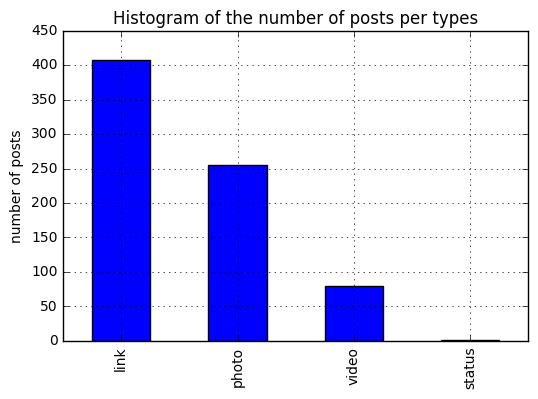

In [21]:
postsDataframe.type.value_counts().plot(kind='bar')
plt.ylabel('number of posts')
plt.title('Histogram of the number of posts per types')
plt.grid(True)
plt.show()

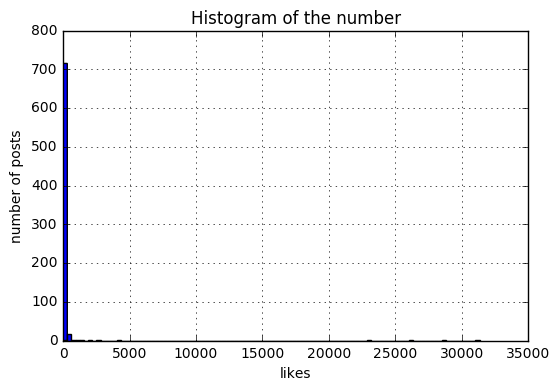

239.80510752688173

In [22]:
fig, ax = plt.subplots()
postsDataframe['likes'].hist(ax=ax, bins=100)
plt.xlabel('likes')
plt.ylabel('number of posts')
plt.title('Histogram of the number')
plt.grid(True)
plt.show()
postsDataframe['likes'].mean()

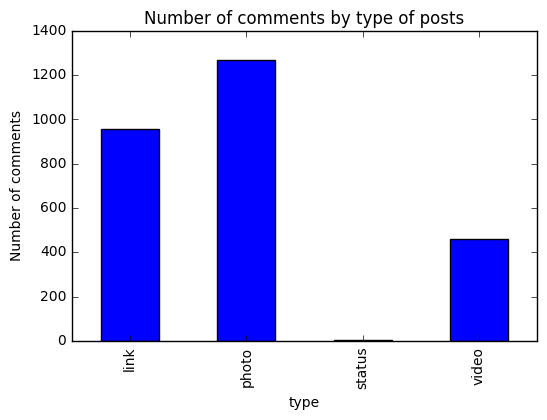

In [23]:
group = postsDataframe.groupby('type').comments.sum()
group.plot(kind='bar').set_ylabel('Number of comments')
plt.title('Number of comments by type of posts')




In [46]:
x, y1, y2 = 'comments', 'created_time', 'likes'

postsDataframe

,comments,id_post,likes,time,type
0,0,995189307173864_1530528866973236,31,2016-09-17T12:02:44+0000,photo
1,8,995189307173864_1526804424012347,0,2016-09-14T07:44:17+0000,photo
2,0,995189307173864_1489719734387483,6,2016-08-14T20:46:05+0000,photo
3,0,995189307173864_1489529507739839,1,2016-08-14T17:46:24+0000,photo
4,0,995189307173864_1489394534420003,21,2016-08-14T15:26:58+0000,photo
5,0,995189307173864_1488265397866250,5,2016-08-13T13:55:27+0000,photo
6,4,995189307173864_1458951137464343,79,2016-07-13T13:28:52+0000,photo
7,0,995189307173864_1405379396154851,19,2016-05-19T17:44:58+0000,photo
8,1,995189307173864_1404983592861098,17,2016-05-19T06:28:57+0000,link
9,0,995189307173864_1399123953447062,41,2016-05-12T10:02:00+0000,photo


In [53]:
from bokeh.plotting import output_notebook, figure, show
from bokeh.layouts import gridplot
from bokeh.models import ColumnDataSource

output_notebook()

x, y1, y2 = 'comments', 'time', 'likes'
n = 100  # Less intensive for the browser.

options = dict(
    tools='pan,box_zoom,wheel_zoom,box_select,lasso_select,crosshair,reset,save',
    x_axis_type='log', y_axis_type='log',
)
plot1 = figure(
    #x_range=[1,1e6],
    x_axis_label=x, y_axis_label=y1,
    **options
)
plot2 = figure(
    x_range=plot1.x_range, y_range=plot1.y_range,
    x_axis_label=x, y_axis_label=y2,
    **options
)

html_color = lambda r,g,b: '#{:02x}{:02x}{:02x}'.format(r,g,b)
#colors = [html_color(150,0,0) if default == 1 else html_color(0,150,0) for default in data['DEFAULT'][:n]]
# The above line is a list comprehension.

#radii = postsDataframe['type'][:n] / 5

# To link brushing (where a selection on one plot causes a selection to update on other plots).
source = ColumnDataSource(data=dict(x=postsDataframe[x][:n], y1=postsDataframe[y1][:n], y2=postsDataframe[y2][:n]))

plot1.scatter('x', 'y1', source=source)
plot2.scatter('x', 'y2', source=source, alpha=0.6)

plot = gridplot([[plot1, plot2]], toolbar_location='right', plot_width=400, plot_height=400, title='adsf')

show(plot)

Loading BokehJS ...

In [65]:
timing = datetime.strptime('2015-04-25T11:14:55+0000','%V')

ValueError: 'V' is a bad directive in format '%V'

In [7]:
engine = create_engine('sqlite:///data/fb.db')

In [15]:
con = sql.connect('facebook_db.db')
df.to_sql('facebook_db.db', con, flavor='sqlite',if_exists="replace")
con.commit()

AttributeError: module 'sqlalchemy.sql' has no attribute 'connect'

## 3.2 Twitter

There exists a bunch of [Python-based clients](https://dev.twitter.com/overview/api/twitter-libraries#python) for Twitter. [Tweepy](http://tweepy.readthedocs.io) is a popular choice.

You will need to create a [Twitter app](https://apps.twitter.com/) and copy the four tokens and secrets in the `credentials.ini` file:
```
[twitter]
consumer_key = YOUR-CONSUMER-KEY
consumer_secret = YOUR-CONSUMER-SECRET
access_token = YOUR-ACCESS-TOKEN
access_secret = YOUR-ACCESS-SECRET
```

In [ ]:
import tweepy  # pip install tweepy

consumer_key = 'Tu8Zmay4wHrV9p8z3H131OrlD'
consumer_secret = 'YP0K691HbH4kxte7zojvYdO3QkSAoPkGctwuCL0sd4i13wxfzA'
access_token = '3092757124-zZYQ1Z75w6jaFPfp7G1CFXMWBBoGN7LAoHXFtQ3'
access_secret = 'gyjp3M3rDeJr4reiUDIJTeo1P8nlzeQlyf1jithwlbl3W'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
api = tweepy.API(auth)

#auth = tweepy.OAuthHandler(credentials.get('twitter', 'consumer_key'), credentials.get('twitter', 'consumer_secret'))
#auth.set_access_token(credentials.get('twitter', 'access_token'), credentials.get('twitter', 'access_secret'))
#api = tweepy.API(auth)

user = 'EPFL_en'

In [ ]:
# Your code here.

# 4 Data analysis

Answer the questions using [pandas](http://pandas.pydata.org/), [statsmodels](http://statsmodels.sourceforge.net/), [scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html), [bokeh](http://bokeh.pydata.org).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [ ]:
# Your code here.